In [308]:
from Cells import Cells
from MGFeatures import *
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import napari
from tifffile import imsave
import skimage.measure
import time
import seaborn as sns
import matplotlib.pyplot as plt
import cc3d
from progressbar import ProgressBar
from scipy import stats
import itertools

In [2]:
features_mito_30 = pd.read_excel(r'C:\Users\Gast-User\Desktop\MGFeatures-main\features_mito_30_3d_v1.xlsx', index_col=0)
features_mito_60 = pd.read_excel(r'C:\Users\Gast-User\Desktop\MGFeatures-main\features_mito_60_3d_v1.xlsx', index_col=0)
features_mito_90 = pd.read_excel(r'C:\Users\Gast-User\Desktop\MGFeatures-main\features_mito_90_3d_v1.xlsx', index_col=0)
features_mito_120 = pd.read_excel(r'C:\Users\Gast-User\Desktop\MGFeatures-main\features_mito_120_3d_v1.xlsx', index_col=0)
features_mito_155 = pd.read_excel(r'C:\Users\Gast-User\Desktop\MGFeatures-main\features_mito_155_3d_v1.xlsx', index_col=0)

In [ ]:
features_mito_60_max = features_mito_60.copy()
features_mito_60_max['mito_3d'] = features_mito_60_max['mito_3d'] + features_mito_30['mito_3d'].max()
features_mito_90_max = features_mito_90.copy()
features_mito_90_max['mito_3d'] = features_mito_90_max['mito_3d'] + features_mito_60_max['mito_3d'].max()
features_mito_120_max = features_mito_120.copy()
features_mito_120_max['mito_3d'] = features_mito_120_max['mito_3d'] + features_mito_90_max['mito_3d'].max()
features_mito_155_max = features_mito_155.copy()
features_mito_155_max['mito_3d'] = features_mito_155_max['mito_3d'] + features_mito_120_max['mito_3d'].max()

In [ ]:
features_mito = pd.DataFrame()
features_mito = features_mito.append(features_mito_30)
features_mito = features_mito.append(features_mito_60_max)
features_mito = features_mito.append(features_mito_90_max)
features_mito = features_mito.append(features_mito_120_max)
features_mito = features_mito.append(features_mito_155_max)
features_mito

In [ ]:
features_mito.reset_index(drop=True, inplace=True)

# MISTAKE: THE VOLUME SHOULD ONLY BE MULTIPLIED BY 20, AS THAT IS DIFFERENCE BETWEEN THE AXIAL AND LATERAL RESOLUTION

In [ ]:
features_mito['volumen'] = features_mito['volumen']/10

In [309]:
features_3d = pd.read_excel(r'C:\Users\Gast-User\Desktop\MGFeatures-main\features3d_all.xlsx', index_col=0)

In [ ]:
features_3d

In [ ]:
features_mito['cell_3d'] = 0
pbar = ProgressBar()
for i in pbar(range(len(features_mito))):
    for j in range(len(features_3d)):
        if (features_mito['min_row'][i] > features_3d['x1'][j]) and (features_mito['min_col'][i] > features_3d['y1'][j]) and (features_mito['max_row'][i] < features_3d['x2'][j]) and (features_mito['max_col'][i] < features_3d['y2'][j]):
            features_mito['cell_3d'][i] = features_3d['id_3d'][j]

In [ ]:
features_mito.to_excel('features_mito_all_v3.xlsx')

In [310]:
features_mito = pd.read_excel('features_mito_all_v3.xlsx', index_col=0)

In [311]:
features_mito

,min_row,min_col,max_row,max_col,sl_num,mito_area,mito_large,volumen,mito_3d,cell_3d
0,3726,29344,3764,29376,0,944,38,18880,1,0
1,3744,29272,3786,29324,0,1700,52,34000,2,0
2,3860,28856,3912,28888,0,1296,52,25920,3,0
3,3874,29368,3916,29410,0,1320,42,26400,4,0
4,3880,29308,3906,29336,0,576,28,11520,5,0
...,...,...,...,...,...,...,...,...,...,...
4256,9958,32520,10008,32564,152,1716,50,34320,3590,674
4257,10666,32504,10710,32546,152,1468,44,29360,3590,674
4258,9964,32660,10002,32712,153,1272,52,25440,3590,674
4259,9970,32600,10014,32638,153,1388,44,27760,3590,674


In [353]:
features_mito_sum_volume = features_mito.groupby('cell_3d').sum().reset_index()
features_mito_sum_volume = features_mito_sum_volume[['cell_3d','volumen']]
features_mito_sum_volume.rename(columns = {'volumen':'mito_sum_volume'}, inplace = True)

In [312]:
features_mito_mean = features_mito.groupby('cell_3d').mean()
features_mito_mean.reset_index()

,cell_3d,min_row,min_col,max_row,max_col,sl_num,mito_area,mito_large,volumen,mito_3d
0,0,10059.502970,27977.416832,10108.029703,28020.921782,38.310891,1573.796040,53.163366,31475.920792,1485.926733
1,1,4153.533333,29388.266667,4200.700000,29432.066667,26.000000,1485.433333,50.233333,29708.666667,1514.300000
2,2,7086.000000,30757.200000,7127.600000,30791.600000,2.000000,1168.000000,41.600000,23360.000000,135.800000
3,3,9594.242647,29889.522059,9634.367647,29926.536765,15.544118,1143.911765,42.845588,22878.235294,927.580882
4,5,10373.777778,31119.777778,10411.111111,31170.444444,7.555556,1390.222222,56.000000,27804.444444,493.444444
...,...,...,...,...,...,...,...,...,...,...
66,612,14993.483871,6362.258065,15038.645161,6409.516129,76.048387,1702.903226,52.032258,34058.064516,3062.500000
67,613,15764.536082,10423.608247,15808.628866,10456.783505,72.453608,1167.391753,44.814433,23347.835052,2986.319588
68,667,13942.666667,6331.333333,13996.333333,6410.333333,79.500000,2400.666667,80.000000,48013.333333,3149.666667
69,671,12959.882353,31195.617647,13015.411765,31257.911765,137.294118,2190.000000,67.264706,43800.000000,3774.941176


In [313]:
features_mito_area = features_mito.groupby('mito_3d').mean().reset_index()
features_mito_area = features_mito_area[['mito_area', 'mito_3d']]
features_mito_area

,mito_area,mito_3d
0,944.0,1
1,1144.0,2
2,1296.0,3
3,1320.0,4
4,576.0,5
...,...,...
3896,1932.0,3936
3897,2376.0,3937
3898,1328.0,3938
3899,1496.0,3939


In [ ]:
features_mito_area.to_excel('features_mito_area_v1.xlsx')

In [314]:

features_mito_volume = features_mito.groupby('mito_3d').sum().reset_index()
features_mito_volume.reset_index(drop=True)
features_mito_volume = features_mito_volume[['volumen', 'mito_3d']]
features_mito_volume

,volumen,mito_3d
0,18880,1
1,45760,2
2,25920,3
3,26400,4
4,11520,5
...,...,...
3896,38640,3936
3897,47520,3937
3898,26560,3938
3899,29920,3939


In [315]:

features_mito_counts = features_mito.groupby('mito_3d', dropna=False).size().reset_index(name='counts')
features_mito_counts

,mito_3d,counts
0,1,1
1,2,2
2,3,1
3,4,1
4,5,1
...,...,...
3896,3936,1
3897,3937,1
3898,3938,1
3899,3939,1


In [ ]:
features_mito_counts.to_excel('features_mito_counts_v4.xlsx')

In [316]:
features_mito_counts['height'] = 0
features_mito_counts['height'] = features_mito_counts['counts']*20 # Half of the height of the section


In [ ]:
features_mito_counts

In [317]:
features_mito_large = pd.DataFrame()
features_mito_large = features_mito.groupby('mito_3d').max().reset_index()
features_mito_large = features_mito_large[['mito_large', 'mito_3d']]
features_mito_large

,mito_large,mito_3d
0,38,1
1,52,2
2,52,3
3,42,4
4,28,5
...,...,...
3896,52,3936
3897,76,3937
3898,44,3938
3899,44,3939


In [318]:
features_mito_diameter = pd.merge(features_mito_counts, features_mito_large, on='mito_3d')
features_mito_diameter['diameter'] = 0
for i in range(len(features_mito_diameter)):
    if features_mito_diameter['mito_large'][i] >= features_mito_diameter['height'][i]:
        features_mito_diameter['diameter'][i] = features_mito_diameter['mito_large'][i]
    else:
        features_mito_diameter['diameter'][i] = features_mito_diameter['height'][i]

In [319]:
features_mito_diameter

,mito_3d,counts,height,mito_large,diameter
0,1,1,20,38,38
1,2,2,40,52,52
2,3,1,20,52,52
3,4,1,20,42,42
4,5,1,20,28,28
...,...,...,...,...,...
3896,3936,1,20,52,52
3897,3937,1,20,76,76
3898,3938,1,20,44,44
3899,3939,1,20,44,44


In [320]:
diameter = features_mito_diameter['diameter']
radius = diameter / 2
volume = (4/3) * np.pi * (radius ** 3)
features_mito_diameter['volume_circ'] = volume
features_mito_diameter

,mito_3d,counts,height,mito_large,diameter,volume_circ
0,1,1,20,38,38,28730.912015
1,2,2,40,52,52,73622.176639
2,3,1,20,52,52,73622.176639
3,4,1,20,42,42,38792.386087
4,5,1,20,28,28,11494.040322
...,...,...,...,...,...,...
3896,3936,1,20,52,52,73622.176639
3897,3937,1,20,76,76,229847.296117
3898,3938,1,20,44,44,44602.238101
3899,3939,1,20,44,44,44602.238101


In [321]:
features_mito_sphericity = pd.merge(features_mito_diameter, features_mito_volume, on= 'mito_3d')

In [322]:
features_mito_sphericity['sphericity'] = (features_mito_sphericity['volumen']/features_mito_sphericity['volume_circ'])**(1./3.)
features_mito_sphericity

,mito_3d,counts,height,mito_large,diameter,volume_circ,volumen,sphericity
0,1,1,20,38,38,28730.912015,18880,0.869396
1,2,2,40,52,52,73622.176639,45760,0.853413
2,3,1,20,52,52,73622.176639,25920,0.706115
3,4,1,20,42,42,38792.386087,26400,0.879601
4,5,1,20,28,28,11494.040322,11520,1.000752
...,...,...,...,...,...,...,...,...
3896,3936,1,20,52,52,73622.176639,38640,0.806633
3897,3937,1,20,76,76,229847.296117,47520,0.591306
3898,3938,1,20,44,44,44602.238101,26560,0.841312
3899,3939,1,20,44,44,44602.238101,29920,0.875390


In [323]:
features_mito_sphericity = pd.merge(features_mito_sphericity, features_mito_area, on='mito_3d')

In [324]:
features_mito_3d = features_mito[['mito_3d', 'cell_3d']]

In [325]:
features_mito_final = pd.DataFrame()
features_mito_final = pd.merge(features_mito_sphericity, features_mito_3d, on='mito_3d')

In [367]:
features_mito_final= features_mito_final.groupby('cell_3d').mean().reset_index()
features_mito_final_mean = features_mito_final[['cell_3d', 'counts', 'mito_area', 'sphericity']]
features_mito_final_sum = features_mito_final.groupby('cell_3d').sum().reset_index()
features_mito_final_volume = pd.merge(features_mito_final_mean, features_mito_sum_volume, on='cell_3d')
features_mito_final_volume

,cell_3d,counts,mito_area,sphericity,mito_sum_volume
0,0,1.225743,1577.012541,0.750968,31790680
1,1,2.466667,1487.700000,0.797498,891260
2,2,1.000000,1168.000000,0.881075,116800
3,3,1.117647,1143.911765,0.842177,3111440
4,5,1.222222,1390.222222,0.731323,250240
...,...,...,...,...,...
66,612,1.032258,1702.903226,0.771063,2111600
67,613,1.257732,1173.613402,0.820100,2264740
68,667,1.333333,2400.666667,0.670533,288080
69,671,1.029412,2130.411765,0.704161,1489200


In [ ]:
features_mito_final.to_excel('features_mito_final_v3.xlsx')

In [369]:
features_mito_final_volume.to_excel('features_mito_final_volume_v2.xlsx')

In [368]:
features_mito_final_volume = features_mito_final_volume.rename(columns = {'counts': 'mito_number', 'sphericity': 'mito_sphericity'})
features_mito_final_volume

,cell_3d,mito_number,mito_area,mito_sphericity,mito_sum_volume
0,0,1.225743,1577.012541,0.750968,31790680
1,1,2.466667,1487.700000,0.797498,891260
2,2,1.000000,1168.000000,0.881075,116800
3,3,1.117647,1143.911765,0.842177,3111440
4,5,1.222222,1390.222222,0.731323,250240
...,...,...,...,...,...
66,612,1.032258,1702.903226,0.771063,2111600
67,613,1.257732,1173.613402,0.820100,2264740
68,667,1.333333,2400.666667,0.670533,288080
69,671,1.029412,2130.411765,0.704161,1489200


# Features nuc

In [4]:
features_nuc_10 = pd.read_excel('features_nuc_10_3d_v1.xlsx', index_col=0)
features_nuc_20 = pd.read_excel('features_nuc_20_3d_v1.xlsx', index_col=0)
features_nuc_30 = pd.read_excel('features_nuc_30_3d_v1.xlsx', index_col=0)
features_nuc_40 = pd.read_excel('features_nuc_40_3d_v1.xlsx', index_col=0)
features_nuc_50 = pd.read_excel('features_nuc_50_3d_v1.xlsx', index_col=0)
features_nuc_60 = pd.read_excel('features_nuc_60_3d_v1.xlsx', index_col=0)
features_nuc_70 = pd.read_excel('features_nuc_70_3d_v1.xlsx', index_col=0)
features_nuc_80 = pd.read_excel('features_nuc_80_3d_v1.xlsx', index_col=0)
features_nuc_90 = pd.read_excel('features_nuc_90_3d_v1.xlsx', index_col=0)
features_nuc_100 = pd.read_excel('features_nuc_100_3d_v1.xlsx', index_col=0)
features_nuc_110 = pd.read_excel('features_nuc_110_3d_v1.xlsx', index_col=0)
features_nuc_120 = pd.read_excel('features_nuc_120_3d_v1.xlsx', index_col=0)
features_nuc_130 = pd.read_excel('features_nuc_130_3d_v1.xlsx', index_col=0)
features_nuc_140 = pd.read_excel('features_nuc_140_3d_v1.xlsx', index_col=0)
features_nuc_155 = pd.read_excel('features_nuc_155_3d_v1.xlsx', index_col=0)

In [12]:
start_time = time.time()
# Initialize the 'mito_large' column with zeros
features_nuc_20['nuc_large'] = 0
pbar = ProgressBar()
# Calculate 'mito_large' values
for y in pbar(range(len(features_nuc_20))):
    D = max(features_nuc_20['max_row'][y] - features_nuc_20['min_row'][y], features_nuc_20['max_col'][y] -features_nuc_20['min_col'][y])
    features_nuc_20.loc[y, 'nuc_large'] = D
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

100% (202 of 202) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Elapsed time:  0.035629987716674805


In [13]:
start_time = time.time()
# Initialize the 'mito_large' column with zeros
features_nuc_30['nuc_large'] = 0
pbar = ProgressBar()
# Calculate 'mito_large' values
for y in pbar(range(len(features_nuc_30))):
    D = max(features_nuc_30['max_row'][y] - features_nuc_30['min_row'][y], features_nuc_30['max_col'][y] -features_nuc_30['min_col'][y])
    features_nuc_30.loc[y, 'nuc_large'] = D
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

100% (657 of 657) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Elapsed time:  0.14418387413024902


In [14]:
start_time = time.time()
# Initialize the 'mito_large' column with zeros
features_nuc_40['nuc_large'] = 0
pbar = ProgressBar()
# Calculate 'mito_large' values
for y in pbar(range(len(features_nuc_40))):
    D = max(features_nuc_40['max_row'][y] - features_nuc_40['min_row'][y], features_nuc_40['max_col'][y] -features_nuc_40['min_col'][y])
    features_nuc_40.loc[y, 'nuc_large'] = D
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Elapsed time:  0.0598146915435791


In [30]:
features_nuc_10['nuc_3d'].max()

174

In [23]:
features_nuc_20_max = features_nuc_20.copy()
features_nuc_20_max['nuc_3d'] = features_nuc_20_max['nuc_3d'] + features_nuc_10['nuc_3d'].max()
features_nuc_30_max = features_nuc_30.copy()
features_nuc_30_max['nuc_3d'] = features_nuc_30_max['nuc_3d'] + features_nuc_20['nuc_3d'].max()
features_nuc_40_max = features_nuc_40.copy()
features_nuc_40_max['nuc_3d'] = features_nuc_40_max['nuc_3d'] + features_nuc_30['nuc_3d'].max()
features_nuc_50_max = features_nuc_50.copy()
features_nuc_50_max['nuc_3d'] = features_nuc_50_max['nuc_3d'] + features_nuc_40['nuc_3d'].max()
features_nuc_60_max = features_nuc_60.copy()
features_nuc_60_max['nuc_3d'] = features_nuc_60_max['nuc_3d'] + features_nuc_50['nuc_3d'].max()
features_nuc_70_max = features_nuc_70.copy()
features_nuc_70_max['nuc_3d'] = features_nuc_70_max['nuc_3d'] + features_nuc_60['nuc_3d'].max()
features_nuc_80_max = features_nuc_80.copy()
features_nuc_80_max['nuc_3d'] = features_nuc_80_max['nuc_3d'] + features_nuc_70['nuc_3d'].max()
features_nuc_90_max = features_nuc_90.copy()
features_nuc_90_max['nuc_3d'] = features_nuc_90_max['nuc_3d'] + features_nuc_80['nuc_3d'].max()
features_nuc_100_max = features_nuc_100.copy()
features_nuc_100_max['nuc_3d'] = features_nuc_100_max['nuc_3d'] + features_nuc_90['nuc_3d'].max()
features_nuc_110_max = features_nuc_110.copy()
features_nuc_110_max['nuc_3d'] = features_nuc_110_max['nuc_3d'] + features_nuc_100['nuc_3d'].max()
features_nuc_120_max = features_nuc_120.copy()
features_nuc_120_max['nuc_3d'] = features_nuc_120_max['nuc_3d'] + features_nuc_110['nuc_3d'].max()
features_nuc_130_max = features_nuc_130.copy()
features_nuc_130_max['nuc_3d'] = features_nuc_130_max['nuc_3d'] + features_nuc_120['nuc_3d'].max()
features_nuc_140_max = features_nuc_140.copy()
features_nuc_140_max['nuc_3d'] = features_nuc_140_max['nuc_3d'] + features_nuc_130['nuc_3d'].max()
features_nuc_155_max = features_nuc_155.copy()
features_nuc_155_max['nuc_3d'] = features_nuc_155_max['nuc_3d'] + features_nuc_140['nuc_3d'].max()

In [31]:
features_nuc = pd.DataFrame()
features_nuc = features_nuc.append(features_nuc_10)
features_nuc = features_nuc.append(features_nuc_20_max)
features_nuc = features_nuc.append(features_nuc_30_max)
features_nuc = features_nuc.append(features_nuc_40_max)
features_nuc = features_nuc.append(features_nuc_50_max)
features_nuc = features_nuc.append(features_nuc_60_max)
features_nuc = features_nuc.append(features_nuc_70_max)
features_nuc = features_nuc.append(features_nuc_80_max)
features_nuc = features_nuc.append(features_nuc_90_max)
features_nuc = features_nuc.append(features_nuc_100_max)
features_nuc = features_nuc.append(features_nuc_110_max)
features_nuc = features_nuc.append(features_nuc_120_max)
features_nuc = features_nuc.append(features_nuc_130_max)
features_nuc = features_nuc.append(features_nuc_140_max)
features_nuc = features_nuc.append(features_nuc_155_max)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\1552169334.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_nuc = features_nuc.append(features_nuc_10)
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\1552169334.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_nuc = features_nuc.append(features_nuc_20_max)
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\1552169334.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_nuc = features_nuc.append(features_nuc_30_max)
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\1552169334.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_nuc

In [32]:
features_nuc.reset_index(drop=True, inplace=True)

In [33]:
features_nuc['volumen'] = features_nuc['volumen']/10

In [34]:
features_nuc.drop('mito_large', inplace = True, axis=1)

In [35]:
features_nuc.to_excel('features_nuc_v2.xlsx')

In [36]:
features_nuc['cell_3d'] = 0
pbar = ProgressBar()
for i in pbar(range(len(features_nuc))):
    for j in range(len(features_3d)):
        if (features_nuc['min_row'][i] > features_3d['x1'][j]) and (features_nuc['min_col'][i] > features_3d['y1'][j]) and (features_nuc['max_row'][i] < features_3d['x2'][j]) and (features_nuc['max_col'][i] < features_3d['y2'][j]):
            features_nuc['cell_3d'][i] = features_3d['id_3d'][j]

  0% (0 of 3593) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\1458936476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_nuc['cell_3d'][i] = features_3d['id_3d'][j]
100% (3593 of 3593) |####################| Elapsed Time: 0:03:03 Time:  0:03:03


In [37]:
features_nuc.to_excel('features_nuc_all_v3.xlsx')

In [329]:
features_nuc = pd.read_excel('features_nuc_all_v3.xlsx')

In [349]:
features_nuc_sum_volume = features_nuc.groupby('cell_3d').sum().reset_index()
features_nuc_sum_volume = features_nuc_sum_volume[['cell_3d','volumen']]
features_nuc_sum_volume.rename(columns = {'volumen':'nuc_sum_volume'}, inplace=True)
features_nuc_sum_volume

,cell_3d,nuc_sum_volume
0,0,690331520
1,1,142880
2,2,20685040
3,3,431980
4,5,42692080
...,...,...
64,613,44911220
65,667,2811600
66,671,81469560
67,674,121365520


In [330]:
features_nuc_area = features_nuc.groupby('nuc_3d').mean().reset_index()
features_nuc_area = features_nuc_area[['nuc_area', 'nuc_3d']]
features_nuc_area

,nuc_area,nuc_3d
0,255881.333333,1
1,24.000000,2
2,97008.000000,3
3,140528.000000,4
4,30432.000000,5
...,...,...
954,2.000000,963
955,1.000000,964
956,1.000000,965
957,1.000000,966


In [331]:
features_nuc_volume = features_nuc.groupby('nuc_3d').sum().reset_index()
features_nuc_volume.reset_index(drop=True)
features_nuc_volume = features_nuc_volume[['volumen', 'nuc_3d']]
features_nuc_volume

,volumen,nuc_3d
0,30705760,1
1,480,2
2,1940160,3
3,5621120,4
4,608640,5
...,...,...
954,40,963
955,20,964
956,20,965
957,20,966


In [332]:
features_nuc_counts = features_nuc.groupby('nuc_3d', dropna=False).size().reset_index(name='counts')
features_nuc_counts['height'] = 0
features_nuc_counts['height'] = features_nuc_counts['counts']*100
features_nuc_counts

,nuc_3d,counts,height
0,1,6,600
1,2,1,100
2,3,1,100
3,4,2,200
4,5,1,100
...,...,...,...
954,963,1,100
955,964,1,100
956,965,1,100
957,966,1,100


In [333]:
features_nuc_large = pd.DataFrame()
features_nuc_large = features_nuc.groupby('nuc_3d').max().reset_index()
features_nuc_large = features_nuc_large[['nuc_large', 'nuc_3d']]
features_nuc_large

,nuc_large,nuc_3d
0,622,1
1,6,2
2,420,3
3,604,4
4,242,5
...,...,...
954,2,963
955,1,964
956,1,965
957,1,966


In [334]:
features_nuc_diameter = pd.merge(features_nuc_counts, features_nuc_large, on='nuc_3d')
features_nuc_diameter['diameter'] = 0
for i in range(len(features_nuc_diameter)):
    if features_nuc_diameter['nuc_large'][i] >= features_nuc_diameter['height'][i]:
        features_nuc_diameter['diameter'][i] = features_nuc_diameter['nuc_large'][i]
    else:
        features_nuc_diameter['diameter'][i] = features_nuc_diameter['height'][i]
diameter = features_nuc_diameter['diameter']
radius = diameter / 2
volume = (4/3) * np.pi * (radius ** 3)
features_nuc_diameter['volume_circ'] = volume
features_nuc_diameter

,nuc_3d,counts,height,nuc_large,diameter,volume_circ
0,1,6,600,622,622,1.259998e+08
1,2,1,100,6,100,5.235988e+05
2,3,1,100,420,420,3.879239e+07
3,4,2,200,604,604,1.153744e+08
4,5,1,100,242,242,7.420697e+06
...,...,...,...,...,...,...
954,963,1,100,2,100,5.235988e+05
955,964,1,100,1,100,5.235988e+05
956,965,1,100,1,100,5.235988e+05
957,966,1,100,1,100,5.235988e+05


In [335]:
features_nuc_sphericity = pd.merge(features_nuc_diameter, features_nuc_volume, on= 'nuc_3d')
features_nuc_sphericity['sphericity'] = (features_nuc_sphericity['volumen']/features_nuc_sphericity['volume_circ'])**(1./3.)
features_nuc_sphericity = pd.merge(features_nuc_sphericity, features_nuc_area, on='nuc_3d')
features_nuc_sphericity

,nuc_3d,counts,height,nuc_large,diameter,volume_circ,volumen,sphericity,nuc_area
0,1,6,600,622,622,1.259998e+08,30705760,0.624621,255881.333333
1,2,1,100,6,100,5.235988e+05,480,0.097144,24.000000
2,3,1,100,420,420,3.879239e+07,1940160,0.368437,97008.000000
3,4,2,200,604,604,1.153744e+08,5621120,0.365234,140528.000000
4,5,1,100,242,242,7.420697e+06,608640,0.434482,30432.000000
...,...,...,...,...,...,...,...,...,...
954,963,1,100,2,100,5.235988e+05,40,0.042431,2.000000
955,964,1,100,1,100,5.235988e+05,20,0.033678,1.000000
956,965,1,100,1,100,5.235988e+05,20,0.033678,1.000000
957,966,1,100,1,100,5.235988e+05,20,0.033678,1.000000


In [346]:
features_nuc_3d = features_nuc[['nuc_3d', 'cell_3d']]
features_nuc_final = pd.DataFrame()
features_nuc_final = pd.merge(features_nuc_sphericity, features_nuc_3d, on='nuc_3d')
features_nuc_final= features_nuc_final.groupby('cell_3d').mean().reset_index()
#features_nuc_final.to_excel('features_nuc_final_v2.xlsx')
features_nuc_final

,cell_3d,nuc_3d,counts,height,nuc_large,diameter,volume_circ,volumen,sphericity,nuc_area
0,0,361.209549,5.761273,576.127321,476.132626,650.275862,2.068796e+08,7.461869e+06,0.333700,62065.978884
1,1,28.000000,3.000000,300.000000,174.000000,300.000000,1.413717e+07,5.070400e+05,0.329782,8450.666667
2,2,48.142857,2.857143,285.714286,588.571429,588.571429,1.147109e+08,7.623680e+06,0.392951,126602.047619
3,3,23.333333,2.333333,233.333333,122.000000,252.000000,1.008738e+07,1.999333e+05,0.322222,6274.444444
4,5,223.333333,5.222222,522.222222,525.111111,599.333333,1.290892e+08,7.635804e+06,0.403489,79548.698060
...,...,...,...,...,...,...,...,...,...,...
64,613,677.914938,3.755187,375.518672,232.487552,416.207469,9.149116e+07,2.555019e+06,0.191508,24227.862903
65,667,53.000000,8.000000,800.000000,762.666667,921.333333,4.373697e+08,1.705937e+07,0.348503,114942.915825
66,671,23.131579,6.815789,681.578947,632.552632,724.236842,3.007490e+08,1.453843e+07,0.412488,98208.362586
67,674,79.247059,6.494118,649.411765,620.964706,771.411765,4.202521e+08,1.366810e+07,0.341538,84064.608863


In [430]:
features_nuc_final_volume = pd.merge(features_nuc_final, features_nuc_sum_volume, on='cell_3d')
features_nuc_final_volume = features_nuc_final_volume.rename(columns = {'counts':'nuc_number', 'sphericity':'nuc_sphericity'})
features_nuc_final_volume = features_nuc_final_volume[['cell_3d', 'nuc_number', 'nuc_sphericity', 'nuc_sum_volume', 'nuc_area']]
features_nuc_final_volume

,cell_3d,nuc_number,nuc_sphericity,nuc_sum_volume,nuc_area
0,0,5.761273,0.333700,690331520,62065.978884
1,1,3.000000,0.329782,142880,8450.666667
2,2,2.857143,0.392951,20685040,126602.047619
3,3,2.333333,0.322222,431980,6274.444444
4,5,5.222222,0.403489,42692080,79548.698060
...,...,...,...,...,...
64,613,3.755187,0.191508,44911220,24227.862903
65,667,8.000000,0.348503,2811600,114942.915825
66,671,6.815789,0.412488,81469560,98208.362586
67,674,6.494118,0.341538,121365520,84064.608863


In [431]:
features_nuc_final_volume.to_excel('features_nuc_final_volume_v3.xlsx')

# Features 3d all

In [711]:
features3d = pd.read_excel('features3d_all.xlsx', index_col=0)

In [712]:
features3d_sel = features3d[['cell_area', 'sum_mito_area', 'nucleus_area', 'heterochromatin_area', 'lysosomal_area', 'gold_area',
                            'cytoplasm_area', 'ER_lengths', 'sl_num', 'x1', 'x2', 'y1', 'y2', 'id_3d']]

In [727]:
features3d_min = features3d.groupby('id_3d').min().reset_index()
features3d_min = features3d_min[['id_3d', 'x1', 'y1']]
features3d_max = features3d.groupby('id_3d').max().reset_index()
features3d_max = features3d_max[['id_3d', 'x2', 'y2']]
features3d_coord = pd.merge(features3d_min, features3d_max, on= 'id_3d')
features3d_coord

,id_3d,x1,y1,x2,y2
0,0,3156,0,18532,35168
1,1,3936,29294,4304,29584
2,2,6512,30648,7338,31254
3,3,9156,29392,10120,30572
4,4,9948,31674,10594,32398
...,...,...,...,...,...
153,675,9866,31874,10164,32032
154,676,9830,32028,10430,32344
155,677,12762,30768,13581,31628
156,679,10672,32222,10728,32282


In [728]:
features3d_grouped = features3d_sel.groupby(by='id_3d').mean().reset_index()
features3d_grouped = features3d_grouped[['id_3d', 'cell_area', 'sum_mito_area', 'nucleus_area', 'heterochromatin_area', 'lysosomal_area', 'gold_area',
                            'cytoplasm_area', 'ER_lengths']]

In [729]:
features3d_grouped

,id_3d,cell_area,sum_mito_area,nucleus_area,heterochromatin_area,lysosomal_area,gold_area,cytoplasm_area,ER_lengths
0,0,119861.127622,2552.879371,49232.407343,27134.956294,264.02972,2539.706294,70628.720280,774.618424
1,1,44368.000000,1557.400000,0.000000,0.000000,0.00000,435.200000,44368.000000,597.363314
2,2,227163.000000,6379.000000,150634.000000,100038.500000,0.00000,3170.500000,76529.000000,562.846345
3,3,107128.375000,4667.031250,674.968750,494.343750,3768.78125,2726.125000,106453.406250,2013.292861
4,4,120598.720000,4863.840000,17517.280000,7862.720000,0.00000,3117.600000,103081.440000,1604.471065
...,...,...,...,...,...,...,...,...,...
153,675,10915.333333,179.333333,0.000000,0.000000,0.00000,493.333333,10915.333333,49.391714
154,676,83398.000000,2474.000000,0.000000,0.000000,0.00000,4372.000000,83398.000000,872.887907
155,677,412531.000000,11706.000000,222448.000000,126657.000000,0.00000,11917.000000,190083.000000,1094.666082
156,679,2008.000000,0.000000,0.000000,0.000000,0.00000,68.000000,2008.000000,0.000000


In [730]:
features3d_counts = features3d.groupby('id_3d', dropna=False).size().reset_index(name='counts')
features3d_counts['height'] = features3d_counts['counts']*20

In [731]:
features3d_counts

,id_3d,counts,height
0,0,572,11440
1,1,5,100
2,2,8,160
3,3,32,640
4,4,25,500
...,...,...,...
153,675,6,120
154,676,2,40
155,677,1,20
156,679,1,20


In [733]:
features3d_large = features3d.copy()
features3d_large['large_side'] = 0
for y in range(len(features3d_large)):
    D = max(features3d_large['x2'][y] - features3d_large['x1'][y], features3d_large['y2'][y] - features3d_large['y1'][y])
    features3d_large['large_side'][y] = D
features3d_max_side = features3d_large.groupby('id_3d').max().reset_index()
features3d_max_side = features3d_max_side[['id_3d', 'large_side']]
features3d_max_side

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\1895039577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features3d_large['large_side'][y] = D


,id_3d,large_side
0,0,1770
1,1,334
2,2,782
3,3,550
4,4,626
...,...,...
153,675,254
154,676,600
155,677,860
156,679,60


In [734]:
features3d_diameter = pd.merge(features3d_counts, features3d_max_side, on='id_3d')
features3d_diameter

,id_3d,counts,height,large_side
0,0,572,11440,1770
1,1,5,100,334
2,2,8,160,782
3,3,32,640,550
4,4,25,500,626
...,...,...,...,...
153,675,6,120,254
154,676,2,40,600
155,677,1,20,860
156,679,1,20,60


In [735]:
features3d_diameter['diameter'] = 0
for i in range(len(features3d_diameter)):
    if features3d_diameter['large_side'][i] >= features3d_diameter['height'][i]:
        features3d_diameter['diameter'][i] = features3d_diameter['large_side'][i]
    else:
        features3d_diameter['diameter'][i] = features3d_diameter['height'][i]
features3d_diameter

,id_3d,counts,height,large_side,diameter
0,0,572,11440,1770,11440
1,1,5,100,334,334
2,2,8,160,782,782
3,3,32,640,550,640
4,4,25,500,626,626
...,...,...,...,...,...
153,675,6,120,254,254
154,676,2,40,600,600
155,677,1,20,860,860
156,679,1,20,60,60


In [736]:
diameter = features3d_diameter['diameter']
radius = diameter / 2
volume = (4/3) * np.pi * (radius ** 3)
features3d_diameter['volume_circ'] = volume
features3d_diameter

,id_3d,counts,height,large_side,diameter,volume_circ
0,0,572,11440,1770,11440,7.839289e+11
1,1,5,100,334,334,1.950914e+07
2,2,8,160,782,782,2.503911e+08
3,3,32,640,550,640,1.372583e+08
4,4,25,500,626,626,1.284463e+08
...,...,...,...,...,...,...
153,675,6,120,254,254,8.580247e+06
154,676,2,40,600,600,1.130973e+08
155,677,1,20,860,860,3.330381e+08
156,679,1,20,60,60,1.130973e+05


In [737]:
features3d_volume = features3d[['cell_area', 'id_3d']]
features3d_volume['volume']= features3d['cell_area'] * 20

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_19808\3849956957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features3d_volume['volume']= features3d['cell_area'] * 20


In [738]:
features3d_volume = features3d_volume.groupby('id_3d').sum().reset_index()
features3d_volume = features3d_volume[['id_3d', 'volume']]


In [739]:
features3d_sphere = pd.merge(features3d_diameter, features3d_volume, on = 'id_3d')
features3d_sphere['sphericity'] = (features3d_sphere['volume']/features3d_sphere['volume_circ'])**(1./3.)
features3d_sphere

,id_3d,counts,height,large_side,diameter,volume_circ,volume,sphericity
0,0,572,11440,1770,11440,7.839289e+11,1371211300,0.120488
1,1,5,100,334,334,1.950914e+07,4436800,0.610394
2,2,8,160,782,782,2.503911e+08,36346080,0.525549
3,3,32,640,550,640,1.372583e+08,68562160,0.793442
4,4,25,500,626,626,1.284463e+08,60299360,0.777196
...,...,...,...,...,...,...,...,...
153,675,6,120,254,254,8.580247e+06,1309840,0.534449
154,676,2,40,600,600,1.130973e+08,3335920,0.308973
155,677,1,20,860,860,3.330381e+08,8250620,0.291517
156,679,1,20,60,60,1.130973e+05,40160,0.708131


In [741]:
features3d_merged = pd.merge(features3d_sphere, features3d_grouped, on='id_3d')
features3d_total = pd.merge(features3d_merged, features3d_coord, on='id_3d')
#features3d_total = features3d_total[['id_3d', 'counts', 'sphericity', 'volume','cell_area', 'sum_mito_area', 'nucleus_area',
                                    #'heterochromatin_area', 'lysosomal_area', 'gold_area', 'cytoplasm_area', 'ER_lengths']]
features3d_total

,id_3d,counts,height,large_side,diameter,volume_circ,volume,sphericity,cell_area,sum_mito_area,nucleus_area,heterochromatin_area,lysosomal_area,gold_area,cytoplasm_area,ER_lengths,x1,y1,x2,y2
0,0,572,11440,1770,11440,7.839289e+11,1371211300,0.120488,119861.127622,2552.879371,49232.407343,27134.956294,264.02972,2539.706294,70628.720280,774.618424,3156,0,18532,35168
1,1,5,100,334,334,1.950914e+07,4436800,0.610394,44368.000000,1557.400000,0.000000,0.000000,0.00000,435.200000,44368.000000,597.363314,3936,29294,4304,29584
2,2,8,160,782,782,2.503911e+08,36346080,0.525549,227163.000000,6379.000000,150634.000000,100038.500000,0.00000,3170.500000,76529.000000,562.846345,6512,30648,7338,31254
3,3,32,640,550,640,1.372583e+08,68562160,0.793442,107128.375000,4667.031250,674.968750,494.343750,3768.78125,2726.125000,106453.406250,2013.292861,9156,29392,10120,30572
4,4,25,500,626,626,1.284463e+08,60299360,0.777196,120598.720000,4863.840000,17517.280000,7862.720000,0.00000,3117.600000,103081.440000,1604.471065,9948,31674,10594,32398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,675,6,120,254,254,8.580247e+06,1309840,0.534449,10915.333333,179.333333,0.000000,0.000000,0.00000,493.333333,10915.333333,49.391714,9866,31874,10164,32032
154,676,2,40,600,600,1.130973e+08,3335920,0.308973,83398.000000,2474.000000,0.000000,0.000000,0.00000,4372.000000,83398.000000,872.887907,9830,32028,10430,32344
155,677,1,20,860,860,3.330381e+08,8250620,0.291517,412531.000000,11706.000000,222448.000000,126657.000000,0.00000,11917.000000,190083.000000,1094.666082,12762,30768,13581,31628
156,679,1,20,60,60,1.130973e+05,40160,0.708131,2008.000000,0.000000,0.000000,0.000000,0.00000,68.000000,2008.000000,0.000000,10672,32222,10728,32282


In [742]:
features3d_total = features3d_total.rename(columns = {'id_3d':'cell_3d'})

In [743]:
features3d_total.to_excel('features3d_total_v2.xlsx')

In [374]:
features3d_total = pd.read_excel('features3d_total_v2.xlsx', index_col = 0)

In [375]:
features_mito_final_volume = features_mito_final_volume.rename(columns={'counts':'mito_number', 'sphericity': 'mito_sphericity'})
features_mito_final_volume.reset_index()
features_mito_final_volume = features_mito_final[['cell_3d', 'mito_number', 'sum_mito_volume', 'mito_sphericity', 'mito_area']]

KeyError: "['mito_number', 'sum_mito_volume', 'mito_sphericity'] not in index"

In [376]:
features3d_mito_total = pd.merge(features3d_total, features_mito_final_volume, on = 'cell_3d')
features3d_mito_total

,cell_3d,counts,height,large_side,diameter,volume_circ,volume,sphericity,cell_area,sum_mito_area,...,cytoplasm_area,ER_lengths,x1,y1,x2,y2,mito_number,mito_area,mito_sphericity,mito_sum_volume
0,0,572,11440,1770,11440,7.839289e+11,1371211300,0.120488,119861.127622,2552.879371,...,70628.720280,774.618424,3156,0,18532,35168,1.225743,1577.012541,0.750968,31790680
1,1,5,100,334,334,1.950914e+07,4436800,0.610394,44368.000000,1557.400000,...,44368.000000,597.363314,3936,29294,4304,29584,2.466667,1487.700000,0.797498,891260
2,2,8,160,782,782,2.503911e+08,36346080,0.525549,227163.000000,6379.000000,...,76529.000000,562.846345,6512,30648,7338,31254,1.000000,1168.000000,0.881075,116800
3,3,32,640,550,640,1.372583e+08,68562160,0.793442,107128.375000,4667.031250,...,106453.406250,2013.292861,9156,29392,10120,30572,1.117647,1143.911765,0.842177,3111440
4,5,8,160,766,766,2.353341e+08,32122160,0.514881,200763.500000,3290.000000,...,68116.000000,1711.243617,9288,30336,10606,31540,1.222222,1390.222222,0.731323,250240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,612,29,580,1574,1574,2.041798e+09,83335200,0.344301,143681.379310,2568.137931,...,95188.965517,578.263602,13678,5354,15396,6928,1.032258,1702.903226,0.771063,2111600
67,613,15,300,704,704,1.826908e+08,50921800,0.653224,169739.333333,814.333333,...,76319.000000,109.402043,15240,10044,16000,10630,1.257732,1173.613402,0.820100,2264740
68,667,1,20,472,472,5.505853e+07,2218640,0.342837,110932.000000,0.000000,...,68752.000000,0.000000,13710,6282,14094,6754,1.333333,2400.666667,0.670533,288080
69,671,33,660,919,919,4.063920e+08,146374420,0.711497,221779.424242,4677.696970,...,110679.909091,447.856284,12410,30794,13527,32028,1.029412,2130.411765,0.704161,1489200


In [377]:
features3d_mito_total.to_excel('features_mito_total_v3.xlsx')

In [45]:
features3d_mito_total = pd.read_excel('features_mito_total_v1.xlsx', index_col=0)

In [748]:
features_nuc_final = features_nuc_final.rename(columns={'counts':'nuc_number', 'volumen':'nuc_volume', 'sphericity': 'nuc_sphericity', 'nuc_area': 'mean_nuc_area'})
features_nuc_final.reset_index()
features_nuc_final = features_nuc_final[['cell_3d', 'nuc_number', 'nuc_volume', 'nuc_sphericity', 'mean_nuc_area']]

In [432]:
features3d_mito_nuc = pd.merge(features3d_mito_total, features_nuc_final_volume, on = 'cell_3d')
features3d_mito_nuc

,cell_3d,counts,height,large_side,diameter,volume_circ,volume,sphericity,cell_area,sum_mito_area,...,x2,y2,mito_number,mito_area,mito_sphericity,mito_sum_volume,nuc_number,nuc_sphericity,nuc_sum_volume,nuc_area
0,0,572,11440,1770,11440,7.839289e+11,1371211300,0.120488,119861.127622,2552.879371,...,18532,35168,1.225743,1577.012541,0.750968,31790680,5.761273,0.333700,690331520,62065.978884
1,1,5,100,334,334,1.950914e+07,4436800,0.610394,44368.000000,1557.400000,...,4304,29584,2.466667,1487.700000,0.797498,891260,3.000000,0.329782,142880,8450.666667
2,2,8,160,782,782,2.503911e+08,36346080,0.525549,227163.000000,6379.000000,...,7338,31254,1.000000,1168.000000,0.881075,116800,2.857143,0.392951,20685040,126602.047619
3,3,32,640,550,640,1.372583e+08,68562160,0.793442,107128.375000,4667.031250,...,10120,30572,1.117647,1143.911765,0.842177,3111440,2.333333,0.322222,431980,6274.444444
4,5,8,160,766,766,2.353341e+08,32122160,0.514881,200763.500000,3290.000000,...,10606,31540,1.222222,1390.222222,0.731323,250240,5.222222,0.403489,42692080,79548.698060
5,6,28,560,708,708,1.858225e+08,133930160,0.896589,239161.000000,3627.250000,...,10828,5994,1.095238,1285.178571,0.804791,2159100,4.214286,0.377400,76455840,80889.158333
6,12,9,180,736,736,2.087527e+08,24316000,0.488375,135088.888889,1414.666667,...,15158,2278,1.000000,2122.000000,0.658789,254640,4.214286,0.419485,11478460,62184.106803
7,13,8,160,896,896,3.766367e+08,31266000,0.436231,195412.500000,6948.500000,...,16802,3562,1.000000,1737.125000,0.733107,1111760,2.909091,0.426157,10219840,51571.619048
8,14,45,900,854,900,3.817035e+08,217823440,0.829455,242026.044444,3715.911111,...,16912,5660,1.017857,1306.642857,0.780487,2926880,4.472727,0.359845,111578440,61733.082434
9,15,8,160,1116,1116,7.277651e+08,61740000,0.439398,385875.000000,6816.500000,...,18140,7802,1.263158,1787.947368,0.701888,1358840,2.928571,0.300632,44244140,92058.229592


In [433]:
features3d_mito_nuc.to_excel('features3d_mito_nuc_v4.xlsx')

In [434]:
features3d_mito_nuc_sel = features3d_mito_nuc[(features3d_mito_nuc['counts'] >= 5) & (features3d_mito_nuc['counts'] < 50)]

In [435]:
features3d_mito_nuc_sel.reset_index(drop = True)

,cell_3d,counts,height,large_side,diameter,volume_circ,volume,sphericity,cell_area,sum_mito_area,...,x2,y2,mito_number,mito_area,mito_sphericity,mito_sum_volume,nuc_number,nuc_sphericity,nuc_sum_volume,nuc_area
0,1,5,100,334,334,1.950914e+07,4436800,0.610394,44368.000000,1557.400000,...,4304,29584,2.466667,1487.700000,0.797498,891260,3.000000,0.329782,142880,8450.666667
1,2,8,160,782,782,2.503911e+08,36346080,0.525549,227163.000000,6379.000000,...,7338,31254,1.000000,1168.000000,0.881075,116800,2.857143,0.392951,20685040,126602.047619
2,3,32,640,550,640,1.372583e+08,68562160,0.793442,107128.375000,4667.031250,...,10120,30572,1.117647,1143.911765,0.842177,3111440,2.333333,0.322222,431980,6274.444444
3,5,8,160,766,766,2.353341e+08,32122160,0.514881,200763.500000,3290.000000,...,10606,31540,1.222222,1390.222222,0.731323,250240,5.222222,0.403489,42692080,79548.698060
4,6,28,560,708,708,1.858225e+08,133930160,0.896589,239161.000000,3627.250000,...,10828,5994,1.095238,1285.178571,0.804791,2159100,4.214286,0.377400,76455840,80889.158333
5,12,9,180,736,736,2.087527e+08,24316000,0.488375,135088.888889,1414.666667,...,15158,2278,1.000000,2122.000000,0.658789,254640,4.214286,0.419485,11478460,62184.106803
6,13,8,160,896,896,3.766367e+08,31266000,0.436231,195412.500000,6948.500000,...,16802,3562,1.000000,1737.125000,0.733107,1111760,2.909091,0.426157,10219840,51571.619048
7,14,45,900,854,900,3.817035e+08,217823440,0.829455,242026.044444,3715.911111,...,16912,5660,1.017857,1306.642857,0.780487,2926880,4.472727,0.359845,111578440,61733.082434
8,15,8,160,1116,1116,7.277651e+08,61740000,0.439398,385875.000000,6816.500000,...,18140,7802,1.263158,1787.947368,0.701888,1358840,2.928571,0.300632,44244140,92058.229592
9,16,7,140,482,482,5.863268e+07,13571360,0.613990,96938.285714,2596.000000,...,17656,34676,1.000000,1652.000000,0.770185,363440,2.500000,0.388416,4467920,53167.366667


In [436]:
features3d_mito_nuc_sel.to_excel('features3d_mito_nuc_sel_v4.xlsx')

# PCA and clustering

In [10]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [437]:
featuresraw = pd.read_excel('features3d_mito_nuc_sel_v4.xlsx',  index_col=0)

In [438]:
featuresraw.reset_index(drop = True, inplace = True)

In [439]:
featuresraw

,cell_3d,counts,height,large_side,diameter,volume_circ,volume,sphericity,cell_area,sum_mito_area,...,x2,y2,mito_number,mito_area,mito_sphericity,mito_sum_volume,nuc_number,nuc_sphericity,nuc_sum_volume,nuc_area
0,1,5,100,334,334,1.950914e+07,4436800,0.610394,44368.000000,1557.400000,...,4304,29584,2.466667,1487.700000,0.797498,891260,3.000000,0.329782,142880,8450.666667
1,2,8,160,782,782,2.503911e+08,36346080,0.525549,227163.000000,6379.000000,...,7338,31254,1.000000,1168.000000,0.881075,116800,2.857143,0.392951,20685040,126602.047619
2,3,32,640,550,640,1.372583e+08,68562160,0.793442,107128.375000,4667.031250,...,10120,30572,1.117647,1143.911765,0.842177,3111440,2.333333,0.322222,431980,6274.444444
3,5,8,160,766,766,2.353341e+08,32122160,0.514881,200763.500000,3290.000000,...,10606,31540,1.222222,1390.222222,0.731323,250240,5.222222,0.403489,42692080,79548.698060
4,6,28,560,708,708,1.858225e+08,133930160,0.896589,239161.000000,3627.250000,...,10828,5994,1.095238,1285.178571,0.804791,2159100,4.214286,0.377400,76455840,80889.158333
5,12,9,180,736,736,2.087527e+08,24316000,0.488375,135088.888889,1414.666667,...,15158,2278,1.000000,2122.000000,0.658789,254640,4.214286,0.419485,11478460,62184.106803
6,13,8,160,896,896,3.766367e+08,31266000,0.436231,195412.500000,6948.500000,...,16802,3562,1.000000,1737.125000,0.733107,1111760,2.909091,0.426157,10219840,51571.619048
7,14,45,900,854,900,3.817035e+08,217823440,0.829455,242026.044444,3715.911111,...,16912,5660,1.017857,1306.642857,0.780487,2926880,4.472727,0.359845,111578440,61733.082434
8,15,8,160,1116,1116,7.277651e+08,61740000,0.439398,385875.000000,6816.500000,...,18140,7802,1.263158,1787.947368,0.701888,1358840,2.928571,0.300632,44244140,92058.229592
9,16,7,140,482,482,5.863268e+07,13571360,0.613990,96938.285714,2596.000000,...,17656,34676,1.000000,1652.000000,0.770185,363440,2.500000,0.388416,4467920,53167.366667


In [502]:
ratios_3d = pd.DataFrame()
ratios_3d['sphericity'] = featuresraw['sphericity']
ratios_3d['mito_sphericity'] = featuresraw['mito_sphericity']
ratios_3d['nuc_sphericity'] = featuresraw['nuc_sphericity']
ratios_3d['mito_cytoplasm_R'] = featuresraw['mito_area']/featuresraw['cytoplasm_area']
ratios_3d['nuc_cell_R'] = featuresraw['nuc_area']/featuresraw['cell_area']

ratios_3d['heterochromatin_nucleus_R'] = featuresraw['heterochromatin_area']/featuresraw['nucleus_area']
ratios_3d['gold_cytoplasm_R'] = featuresraw['gold_area']/featuresraw['cytoplasm_area']
ratios_3d['lysosome_cytoplasm_R'] = featuresraw['lysosomal_area']/featuresraw['cytoplasm_area']
ratios_3d['ER_lengths_R'] = featuresraw['ER_lengths']/featuresraw['cytoplasm_area']

In [503]:
ratios_3d

,sphericity,mito_sphericity,nuc_sphericity,mito_cytoplasm_R,nuc_cell_R,heterochromatin_nucleus_R,gold_cytoplasm_R,lysosome_cytoplasm_R,ER_lengths_R
0,0.610394,0.797498,0.329782,0.033531,0.190468,NaN,0.009809,0.000000,0.013464
1,0.525549,0.881075,0.392951,0.015262,0.557318,0.664116,0.041429,0.000000,0.007355
2,0.793442,0.842177,0.322222,0.010746,0.058569,0.732395,0.025609,0.035403,0.018912
3,0.514881,0.731323,0.403489,0.020410,0.396231,0.472730,0.010945,0.000000,0.025122
4,0.896589,0.804791,0.377400,0.011720,0.338221,0.608795,0.074018,0.000000,0.000087
5,0.488375,0.658789,0.419485,0.029753,0.460320,0.394518,0.039962,0.000000,0.009700
6,0.436231,0.733107,0.426157,0.013206,0.263912,0.570717,0.035621,0.000000,0.007475
7,0.829455,0.780487,0.359845,0.012589,0.255068,0.635047,0.020713,0.000000,0.007982
8,0.439398,0.701888,0.300632,0.009585,0.238570,0.600623,0.066502,0.000000,0.006735
9,0.613990,0.770185,0.388416,0.025406,0.548466,0.538183,0.048632,0.000000,0.004745


In [504]:
ratios_3d.fillna(0, inplace=True)

In [189]:
ratios_3d_nolyso = ratios_3d.drop([2])

In [190]:
ratios_3d_nolyso.reset_index(drop=True)

,sphericity,mito_sphericity,nuc_sphericity,mito_cytoplasm_area_R,nuc_cell_area_R,heterochromatin_nucleus_R,gold_cytoplasm_R,lysosome_cytoplasm_R,ER_lengths_R
0,0.610394,0.797498,0.329782,0.035102,0.000000,0.000000,0.009809,0.000000,0.013464
1,0.525549,0.881075,0.392951,0.083354,0.663110,0.664116,0.041429,0.000000,0.007355
2,0.514881,0.731323,0.403489,0.048300,0.660715,0.472730,0.010945,0.000000,0.025122
3,0.896589,0.804791,0.377400,0.033078,0.541495,0.608795,0.074018,0.000000,0.000087
4,0.488375,0.658789,0.419485,0.019836,0.472054,0.394518,0.039962,0.000000,0.009700
5,0.436231,0.733107,0.426157,0.052825,0.326868,0.570717,0.035621,0.000000,0.007475
6,0.829455,0.780487,0.359845,0.035802,0.571159,0.635047,0.020713,0.000000,0.007982
7,0.439398,0.701888,0.300632,0.036543,0.516589,0.600623,0.066502,0.000000,0.006735
8,0.613990,0.770185,0.388416,0.039923,0.329217,0.538183,0.048632,0.000000,0.004745
9,0.495475,0.675596,0.327272,0.044792,0.357715,0.463618,0.026777,0.000000,0.008119


In [593]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance.
std = scaler.fit_transform(ratios_3d) #returns a transformed array
pca = PCA()
pca.fit(std)

PCA()

In [594]:
pca.explained_variance_ratio_.cumsum()

array([0.23720347, 0.44052526, 0.61014939, 0.72886261, 0.82056741,
       0.89098494, 0.93642663, 0.96986874, 1.        ])

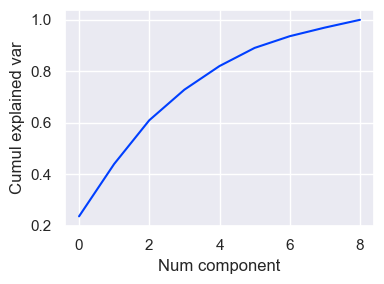

In [601]:
plt.figure(figsize=(4, 3))
plt.plot(range(0,9), pca.explained_variance_ratio_.cumsum()) #use number of atributes for the range of the plot
plt.xlabel('Num component')
plt.ylabel('Cumul explained var')
plt.tight_layout()
plt.savefig('acumulative_pca_mean.png')

In [587]:
pca = PCA(n_components=3)
pca.fit(std)
scores_pca = pca.transform(std)

In [588]:
wcss = []
for i in range(1,22):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

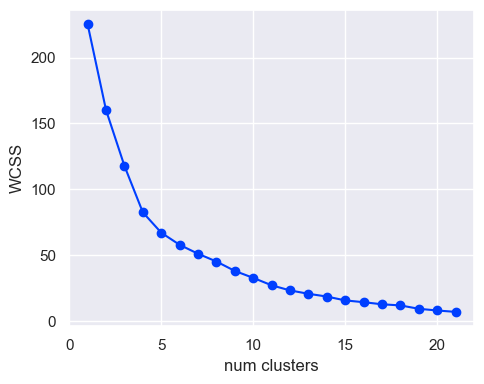

In [602]:
plt.figure(figsize = (5,4))
plt.plot(range(1, 22), wcss, marker='o')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.savefig('wcss_pca3.png')

In [511]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [512]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [513]:
ratios_pca = pd.concat([ratios_3d.reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)
ratios_pca.columns.values[-3:] = ['Component1', 'Component2', 'Component3']
ratios_pca['pca_kmeans_labels'] = kmeans_pca.labels_

In [514]:
ratios_plot = ratios_pca[['sphericity',
                         'mito_sphericity',
                        'nuc_sphericity',
                          'mito_cytoplasm_R',
                          'nuc_cell_R',
                            #'mito_volume_R',
                          #'nuc_volume_R',
                          'heterochromatin_nucleus_R',
                          'gold_cytoplasm_R',
                          'lysosome_cytoplasm_R',
                          'ER_lengths_R',
                         'pca_kmeans_labels'
                            ]]


In [515]:
ratios_plot = ratios_plot.fillna(0)

In [286]:
# 5 cmap
cmap = {0:'#3a60c2',
       1: '#bf4dab', #purple
       2:'#f9526d', 
       3:'#f38928',
       4:'#b8c20e',
       5: 'orange',
       6: 'pink'}

clabels = [cmap.get(k) for k in ratios_plot['pca_kmeans_labels']]
#3a60c2
#bf4dab
#f9526d
#f38928
#b8c20e

In [576]:
# 4 cmap
cmap = {0:'#0284c2',
       1: '#b273c7', #purple
       2:'#ff6579', 
       3:'#e09b02',
       4:'#e09b02',
       5: 'orange',
       6: 'pink'}

clabels = [cmap.get(k) for k in ratios_plot['pca_kmeans_labels']]
#0284c2
#b273c7
#ff6579
#e09b02

In [483]:
# 3 cmap
cmap = {0:'#4075c2',
       1: '#d95d86', #purple
       2:'#bd9428', 
       3:'#bd9500',
       4:'#b8c20e',
       5: 'orange',
       6: 'pink'}

clabels = [cmap.get(k) for k in ratios_plot['pca_kmeans_labels']]
#4075c2
#d95d86
#bd9428

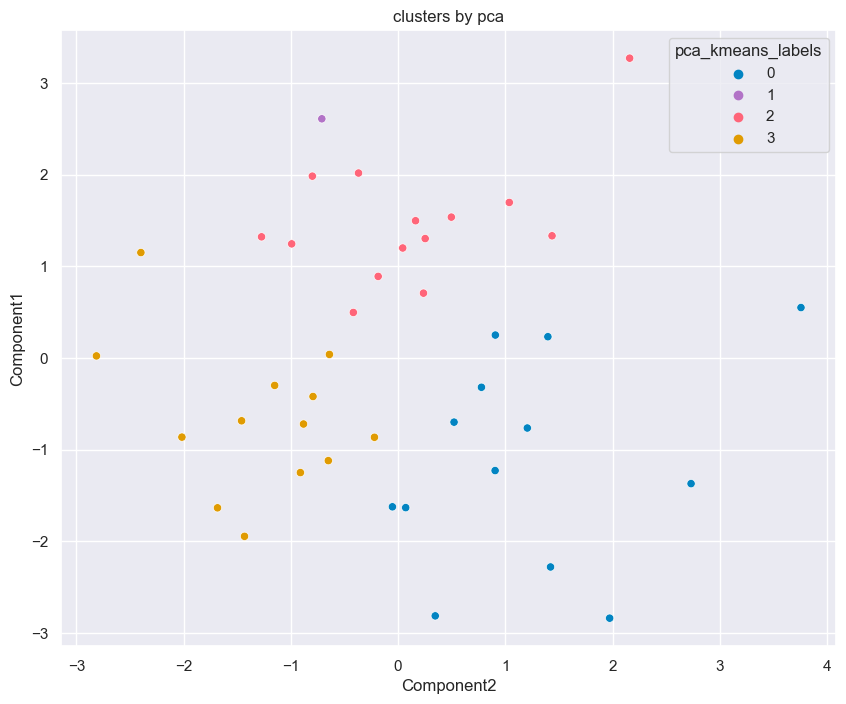

In [603]:
x_axis = ratios_pca['Component2']
y_axis = ratios_pca['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(data=ratios_pca, x='Component2', y='Component1', hue='pca_kmeans_labels', palette=cmap)
sns.scatterplot(s = 100)

plt.title('clusters by pca')
plt.savefig('final_pca3_cluster4.png')

KeyboardInterrupt: 

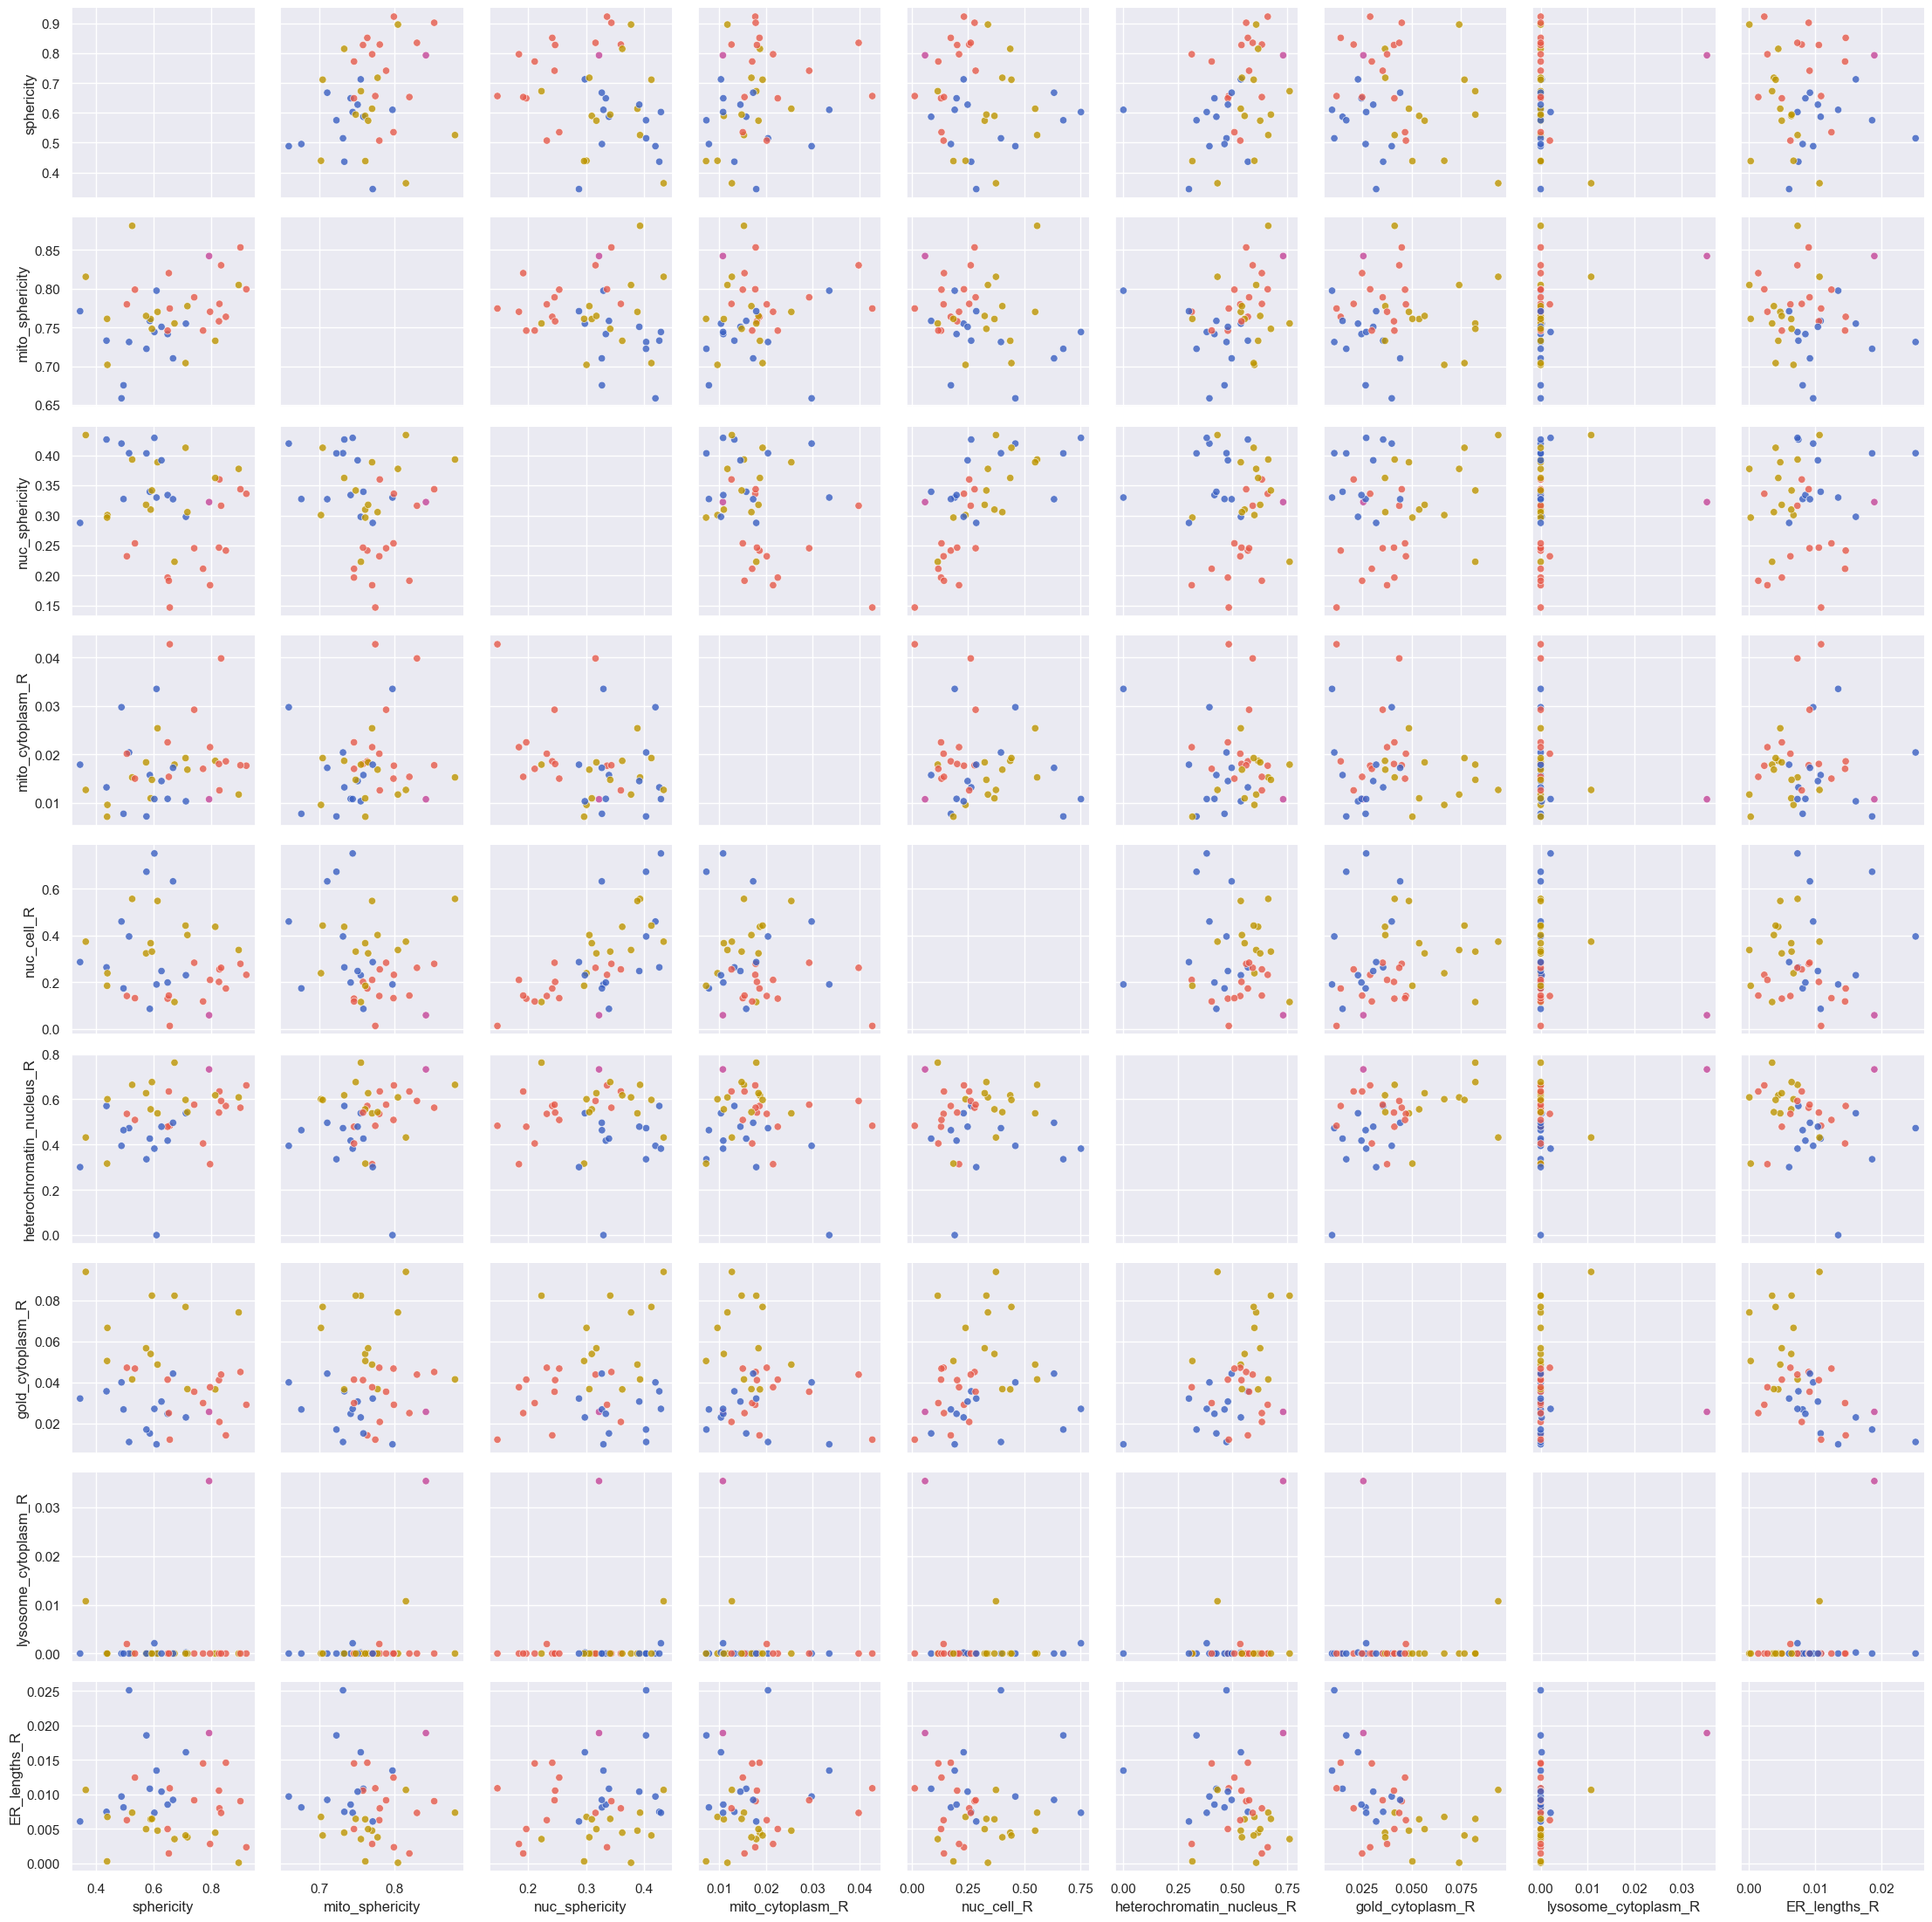

In [518]:
sns.set(rc={'figure.figsize':(100,120)})
g = sns.PairGrid(ratios_plot,
                 hue='pca_kmeans_labels',
                 palette=cmap
                )

g.map_offdiag(sns.scatterplot, alpha=0.8)
g.map_diag(sns.histplot)
g.add_legend()
plt.savefig('features3d_mean_5pca_5clusters.png')

In [222]:
sns.violinplot(ratios_plot, 
                  x = 'pca_kmeans_labels',
                  y = 'sphericity', 
                hue='pca_kmeans_labels',
               palette = cmap,
              scale = 'count',
              inner = 'stick')

<Axes: xlabel='pca_kmeans_labels', ylabel='sphericity'>

<Figure size 10000x12000 with 0 Axes>

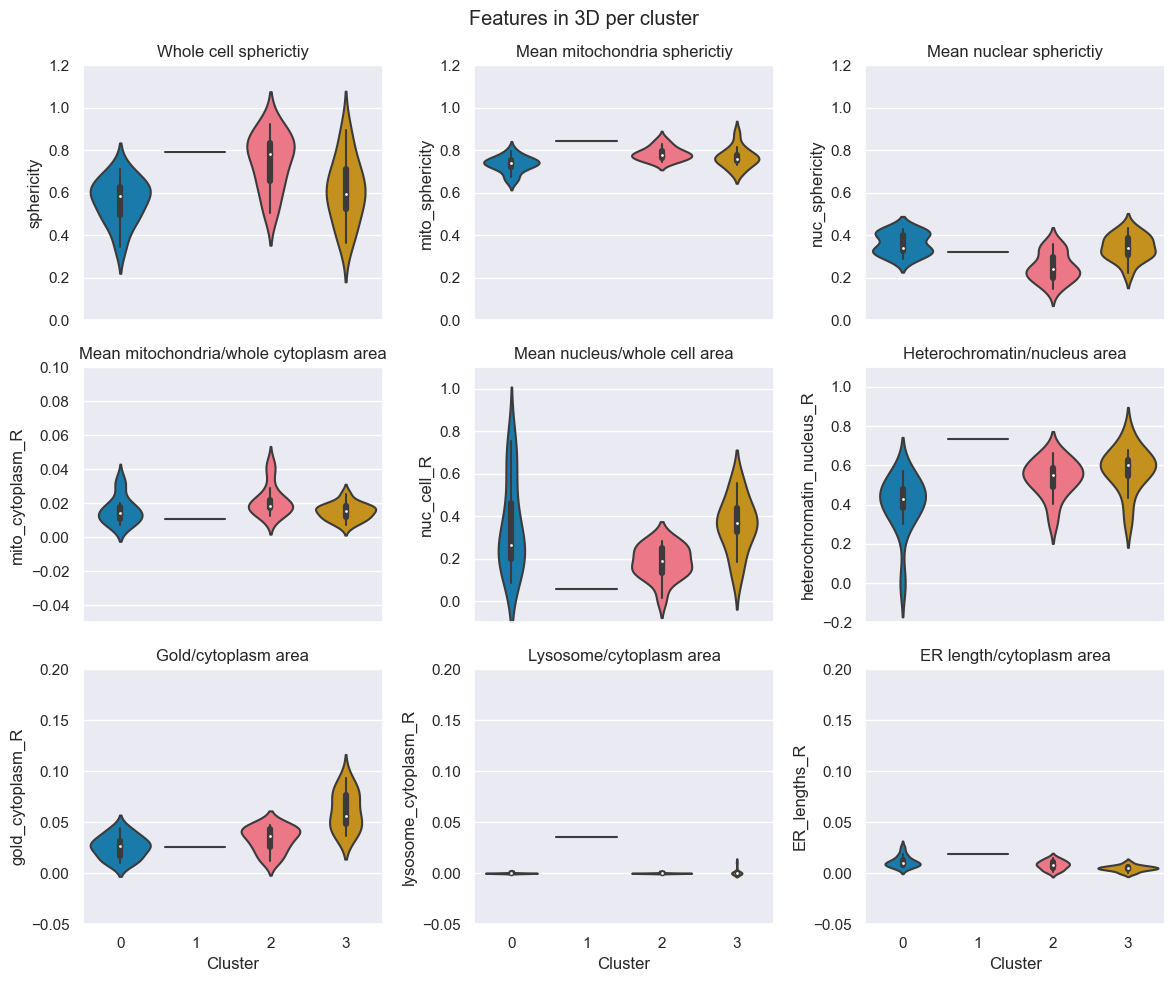

In [605]:
plt.clf()
features = ['sphericity', 'mito_sphericity', 'nuc_sphericity',  'mito_cytoplasm_R','nuc_cell_R', 'heterochromatin_nucleus_R', 'gold_cytoplasm_R', 'lysosome_cytoplasm_R', 'ER_lengths_R']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Features in 3D per cluster')

# Loop through each feature and create a violinplot in the corresponding subplot
for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.violinplot(data=ratios_plot, x='pca_kmeans_labels', y=feature, ax=axes[row, col], 
                   palette = cmap, legend = False)
    axes[row, col].set_title(feature)
axes[0, 0].set_ylim(0, 1.2)
axes[0, 1].set_ylim(0, 1.2)
axes[0, 2].set_ylim(0, 1.2)
axes[1, 0].set_ylim(-0.05, 0.1)
axes[1, 1].set_ylim(-0.1, 1.1)
axes[1, 2].set_ylim(-0.2, 1.1)
axes[2,0].set_ylim(-0.05,0.2)
axes[2,1].set_ylim(-0.05, 0.2)
axes[2,2].set_ylim(-0.05, 0.2)
axes[0, 0].set_title("Whole cell spherictiy")
axes[0, 1].set_title("Mean mitochondria spherictiy")
axes[0, 2].set_title("Mean nuclear spherictiy")
axes[1, 0].set_title("Mean mitochondria/whole cytoplasm area")
axes[1, 1].set_title("Mean nucleus/whole cell area")
axes[1, 2].set_title("Heterochromatin/nucleus area")
axes[2, 0].set_title("Gold/cytoplasm area")
axes[2, 1].set_title("Lysosome/cytoplasm area")
axes[2, 2].set_title("ER length/cytoplasm area")
for j in range(3):
    axes[2, j].set_xlabel("Cluster")

# Remove x-axis for all other rows except the last one
for i in range(2):
    for j in range(3):
        axes[i, j].xaxis.set_visible(False)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots

plt.savefig('violin_final_pca3_3clusters.png')

In [ ]:
ratios_plot = ratios_pca[['sphericity',
                         'mito_sphericity',
                        'nuc_sphericity',
                          'mito_cytoplasm_area_R',
                          'nuc_cell_area_R',
                          'heterochromatin_nucleus_R',
                          'gold_cytoplasm_R',
                          'lysosome_cytoplasm_R',
                          'ER_lengths_R',
                         'pca_kmeans_labels'
                            ]]


In [365]:
data = ratios_plot['sphericity']
stat, p = stats.shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

# Interpret the p-value
if p > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

Shapiro-Wilk test statistic: 0.9783025979995728, p-value: 0.6116123199462891
The data appears to be normally distributed.


# Statistical analysis


## 1. Volume PCA 3 cluster 5

#### Sphericity

In [545]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['sphericity']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.9604083299636841, p-value: 0.7599549293518066
Subgroup 3:
Shapiro-Wilk test statistic: 0.978395402431488, p-value: 0.9708036184310913
Subgroup 2:
Shapiro-Wilk test statistic: 0.9284022450447083, p-value: 0.2897576093673706


Normally distributed

In [241]:
subgroups = {}

# Create an empty list to store data from each subgroup
data_lists = []

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    #if value in [0,2,4]:
    # Create a subgroup based on the unique value
    subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

    # Extract the 'sphericity' values for this subgroup
    data = subgroup['sphericity']

    # Append the data to the list
    data_lists.append(data)

    # Print or store the results
    print(f"Subgroup {value}:")
    print(f"Number of observations: {len(data)}")

# Perform Levene's test for homogeneity of variances
stat, p = stats.levene(*data_lists)

# Print the overall result
print("\nOverall Levene's Test Result:")
print(f"Levene's test statistic: {stat}, p-value: {p}")

Subgroup 0:
Number of observations: 3
Subgroup 1:
Number of observations: 18
Subgroup 2:
Number of observations: 20

Overall Levene's Test Result:
Levene's test statistic: 1.3977482047746006, p-value: 0.2595709674867745


Equal distribution: Student t-test

In [546]:
# Student t-test
subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform unpaired Student's t-test for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['sphericity']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['sphericity']  # Replace 'my_data' with your actual column name

    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Student's t-test statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Student's t-test statistic: -0.9689498787685105
P-value: 0.3422343018301206

Comparison between Subgroup 0 and Subgroup 2:
Student's t-test statistic: -4.114401051584054
P-value: 0.00036913026298374227

Comparison between Subgroup 3 and Subgroup 2:
Student's t-test statistic: -2.51960710860614
P-value: 0.018508789279261452



#### Mito sphericity

In [547]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['mito_sphericity']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.9530462622642517, p-value: 0.6450775265693665
Subgroup 3:
Shapiro-Wilk test statistic: 0.9214435815811157, p-value: 0.2623448669910431
Subgroup 2:
Shapiro-Wilk test statistic: 0.9462572336196899, p-value: 0.5042461156845093


In [659]:
subgroups = {}

# Create an empty list to store data from each subgroup
data_lists = []

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,4]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the 'sphericity' values for this subgroup
        data = subgroup['mito_sphericity']

        # Append the data to the list
        data_lists.append(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Number of observations: {len(data)}")

# Perform Levene's test for homogeneity of variances
stat, p = stats.levene(*data_lists)

# Print the overall result
print("\nOverall Levene's Test Result:")
print(f"Levene's test statistic: {stat}, p-value: {p}")

Subgroup 2:
Number of observations: 11
Subgroup 4:
Number of observations: 10
Subgroup 0:
Number of observations: 18

Overall Levene's Test Result:
Levene's test statistic: 0.6855565614519584, p-value: 0.5102657347505536


### We assume normal distribution and equal variances -> Student t-test

In [548]:
# Student t-test
subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform unpaired Student's t-test for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['mito_sphericity']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['mito_sphericity']  # Replace 'my_data' with your actual column name

    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Student's t-test statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Student's t-test statistic: -1.9730405550500734
P-value: 0.06011493444246632

Comparison between Subgroup 0 and Subgroup 2:
Student's t-test statistic: -3.908377765867167
P-value: 0.0006266577875548313

Comparison between Subgroup 3 and Subgroup 2:
Student's t-test statistic: -1.2266933014813286
P-value: 0.23136599508770578



#### Nuclear sphericity

In [549]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['nuc_sphericity']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.8882989287376404, p-value: 0.09246765822172165
Subgroup 3:
Shapiro-Wilk test statistic: 0.9611626863479614, p-value: 0.7715144157409668
Subgroup 2:
Shapiro-Wilk test statistic: 0.9335935711860657, p-value: 0.34240540862083435


In [550]:
subgroups = {}

# Create an empty list to store data from each subgroup
data_lists = []

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the 'sphericity' values for this subgroup
        data = subgroup['nuc_sphericity']

        # Append the data to the list
        data_lists.append(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Number of observations: {len(data)}")

# Perform Levene's test for homogeneity of variances
stat, p = stats.levene(*data_lists)

# Print the overall result
print("\nOverall Levene's Test Result:")
print(f"Levene's test statistic: {stat}, p-value: {p}")

Subgroup 0:
Number of observations: 13
Subgroup 3:
Number of observations: 13
Subgroup 2:
Number of observations: 14

Overall Levene's Test Result:
Levene's test statistic: 0.09595735845457593, p-value: 0.9087280942369952


In [551]:
# Student t-test
subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform unpaired Student's t-test for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['nuc_sphericity']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['nuc_sphericity']  # Replace 'my_data' with your actual column name

    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Student's t-test statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Student's t-test statistic: 0.913781452413062
P-value: 0.369920976759724

Comparison between Subgroup 0 and Subgroup 2:
Student's t-test statistic: 4.962747951362988
P-value: 4.104297331249407e-05

Comparison between Subgroup 3 and Subgroup 2:
Student's t-test statistic: 3.8801528934334035
P-value: 0.0006735905534723494



## Mito volume ratio

In [554]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['mito_cytoplasm_R']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.880343496799469, p-value: 0.0720781534910202
Subgroup 3:
Shapiro-Wilk test statistic: 0.9740029573440552, p-value: 0.9370136260986328
Subgroup 2:
Shapiro-Wilk test statistic: 0.7893147468566895, p-value: 0.00369285442866385


In [666]:
subgroups = {}

# Create an empty list to store data from each subgroup
data_lists = []

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,4]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the 'sphericity' values for this subgroup
        data = subgroup['mito_volume_R']

        # Append the data to the list
        data_lists.append(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Number of observations: {len(data)}")

# Perform Levene's test for homogeneity of variances
stat, p = stats.levene(*data_lists)

# Print the overall result
print("\nOverall Levene's Test Result:")
print(f"Levene's test statistic: {stat}, p-value: {p}")

Subgroup 2:
Number of observations: 11
Subgroup 4:
Number of observations: 10
Subgroup 0:
Number of observations: 18

Overall Levene's Test Result:
Levene's test statistic: 4.417472464148134, p-value: 0.019246221614151904


In [555]:
# Mann-WHitney U test

subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
     if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform Mann-Whitney U tests for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['mito_cytoplasm_R']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['mito_cytoplasm_R']  # Replace 'my_data' with your actual column name

    stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Mann-Whitney U test statistic: {stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Mann-Whitney U test statistic: 79.0
P-value: 0.7976340690559742

Comparison between Subgroup 0 and Subgroup 2:
Mann-Whitney U test statistic: 48.0
P-value: 0.039173308961157845

Comparison between Subgroup 3 and Subgroup 2:
Mann-Whitney U test statistic: 47.0
P-value: 0.0347819484147747



## Nuclear volume ratio

In [556]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['nuc_cell_R']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.8845082521438599, p-value: 0.08209925889968872
Subgroup 3:
Shapiro-Wilk test statistic: 0.9644339680671692, p-value: 0.8202226161956787
Subgroup 2:
Shapiro-Wilk test statistic: 0.9354223012924194, p-value: 0.36281999945640564


In [558]:
# Mann-WHitney U test

subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
     if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform Mann-Whitney U tests for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['nuc_cell_R']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['nuc_cell_R']  # Replace 'my_data' with your actual column name

    stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Mann-Whitney U test statistic: {stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Mann-Whitney U test statistic: 74.0
P-value: 0.6080768794659228

Comparison between Subgroup 0 and Subgroup 2:
Mann-Whitney U test statistic: 137.0
P-value: 0.0272484408923059

Comparison between Subgroup 3 and Subgroup 2:
Mann-Whitney U test statistic: 158.0
P-value: 0.001251000300597849



### Heterochromatin/nucleus ratio

In [559]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['heterochromatin_nucleus_R']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.8211615085601807, p-value: 0.012297063134610653
Subgroup 3:
Shapiro-Wilk test statistic: 0.9242997169494629, p-value: 0.2865194082260132
Subgroup 2:
Shapiro-Wilk test statistic: 0.9341095685958862, p-value: 0.3480644226074219


In [671]:
subgroups = {}

# Create an empty list to store data from each subgroup
data_lists = []

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,4]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the 'sphericity' values for this subgroup
        data = subgroup['heterochromatin_nucleus_R']

        # Append the data to the list
        data_lists.append(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Number of observations: {len(data)}")

# Perform Levene's test for homogeneity of variances
stat, p = stats.levene(*data_lists)

# Print the overall result
print("\nOverall Levene's Test Result:")
print(f"Levene's test statistic: {stat}, p-value: {p}")

Subgroup 2:
Number of observations: 11
Subgroup 4:
Number of observations: 10
Subgroup 0:
Number of observations: 18

Overall Levene's Test Result:
Levene's test statistic: 0.06984847885462521, p-value: 0.9326611700055707


In [560]:
# Mann-Whitney U-test
subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform unpaired Student's t-test for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['heterochromatin_nucleus_R']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['heterochromatin_nucleus_R']  # Replace 'my_data' with your actual column name

    stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Student's t-test statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Student's t-test statistic: 3.8801528934334035
P-value: 0.001234575724641128

Comparison between Subgroup 0 and Subgroup 2:
Student's t-test statistic: 3.8801528934334035
P-value: 0.0052666686477406775

Comparison between Subgroup 3 and Subgroup 2:
Student's t-test statistic: 3.8801528934334035
P-value: 0.16666623948362103



### gold_cytoplasm_R

In [561]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['gold_cytoplasm_R']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.9706083536148071, p-value: 0.901431679725647
Subgroup 3:
Shapiro-Wilk test statistic: 0.938468873500824, p-value: 0.43738412857055664
Subgroup 2:
Shapiro-Wilk test statistic: 0.9119181632995605, p-value: 0.16802051663398743


In [674]:
subgroups = {}

# Create an empty list to store data from each subgroup
data_lists = []

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,4]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the 'sphericity' values for this subgroup
        data = subgroup['gold_cytoplasm_R']

        # Append the data to the list
        data_lists.append(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Number of observations: {len(data)}")

# Perform Levene's test for homogeneity of variances
stat, p = stats.levene(*data_lists)

# Print the overall result
print("\nOverall Levene's Test Result:")
print(f"Levene's test statistic: {stat}, p-value: {p}")

Subgroup 2:
Number of observations: 11
Subgroup 4:
Number of observations: 10
Subgroup 0:
Number of observations: 18

Overall Levene's Test Result:
Levene's test statistic: 2.8642246416849084, p-value: 0.0700913767993291


In [562]:
## Student t-test
subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
     if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform Welch's t-test for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['gold_cytoplasm_R']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['gold_cytoplasm_R']  # Replace 'my_data' with your actual column name

    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Welch's t-test statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Welch's t-test statistic: -5.886570306462563
P-value: 4.5063325153924785e-06

Comparison between Subgroup 0 and Subgroup 2:
Welch's t-test statistic: -1.7361342090311438
P-value: 0.09485061814448238

Comparison between Subgroup 3 and Subgroup 2:
Welch's t-test statistic: 4.6329189114156915
P-value: 9.648878623454783e-05



### 'lysosome_cytoplasm_R'


In [565]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['lysosome_cytoplasm_R']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.3524937033653259, p-value: 9.292468803323573e-07
Subgroup 3:
Shapiro-Wilk test statistic: 0.3110067844390869, p-value: 5.044599902248592e-07
Subgroup 2:
Shapiro-Wilk test statistic: 0.2968406677246094, p-value: 2.189835015542485e-07


In [566]:
# Mann-WHitney U test

subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
     if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform Mann-Whitney U tests for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['lysosome_cytoplasm_R']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['lysosome_cytoplasm_R']  # Replace 'my_data' with your actual column name

    stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Mann-Whitney U test statistic: {stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Mann-Whitney U test statistic: 90.0
P-value: 0.6440859303254874

Comparison between Subgroup 0 and Subgroup 2:
Mann-Whitney U test statistic: 98.5
P-value: 0.533724659235096

Comparison between Subgroup 3 and Subgroup 2:
Mann-Whitney U test statistic: 92.0
P-value: 0.9574030880639106



### 'ER_lengths_R'

In [567]:
subgroups = {}


# Iterate through unique values in the 'pca_kmeans_values' column
for value in ratios_plot['pca_kmeans_labels'].unique():
    if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]

        # Extract the data_column values for this subgroup
        data = subgroup['ER_lengths_R']

        # Perform the Shapiro-Wilk test for normality
        stat, p = stats.shapiro(data)

        # Print or store the results
        print(f"Subgroup {value}:")
        print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

        # You can add logic here to decide what to do with the results
        # For example, you can check if p < 0.05 to determine if the subgroup is not normally distributed
        # and perform further analyses as needed

        # Store the subgroup in the dictionary
        subgroups[value] = subgroup

Subgroup 0:
Shapiro-Wilk test statistic: 0.8412498235702515, p-value: 0.021988816559314728
Subgroup 3:
Shapiro-Wilk test statistic: 0.9490253925323486, p-value: 0.5835977792739868
Subgroup 2:
Shapiro-Wilk test statistic: 0.9579483270645142, p-value: 0.6892021298408508


In [568]:
# Mann-WHitney U test

subgroups = {}

# Iterate through unique values in the 'pca_kmeans_labels' column
for value in ratios_plot['pca_kmeans_labels'].unique():
     if value in [0,2,3]:
        # Create a subgroup based on the unique value
        subgroup = ratios_plot[ratios_plot['pca_kmeans_labels'] == value]
        subgroups[value] = subgroup

# Perform Mann-Whitney U tests for pairwise comparisons within subgroups
for group1, group2 in itertools.combinations(subgroups.keys(), 2):
    data1 = subgroups[group1]['ER_lengths_R']  # Replace 'my_data' with your actual column name
    data2 = subgroups[group2]['ER_lengths_R']  # Replace 'my_data' with your actual column name

    stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"Comparison between Subgroup {group1} and Subgroup {group2}:")
    print(f"Mann-Whitney U test statistic: {stat}")
    print(f"P-value: {p_value}")
    print()

Comparison between Subgroup 0 and Subgroup 3:
Mann-Whitney U test statistic: 156.0
P-value: 0.0002715540868845109

Comparison between Subgroup 0 and Subgroup 2:
Mann-Whitney U test statistic: 121.0
P-value: 0.15228075837759505

Comparison between Subgroup 3 and Subgroup 2:
Mann-Whitney U test statistic: 49.0
P-value: 0.04402679859151475



# NAPARI

In [680]:
from MGFeatures import remake_bbox, make_bbox_stack

In [606]:
featuresraw_2 = featuresraw.copy()
for i in range(len(featuresraw_2)):
    if featuresraw_2['y1'][i] > 28080:
        featuresraw_2['y1'][i] =  featuresraw_2['y1'][i]-37440
    if featuresraw_2['y2'][i] > 28080:
        featuresraw_2['y2'][i] =  featuresraw_2['y2'][i]-37440
featuresraw_3 = featuresraw_2.copy()
for i in range(len(featuresraw_3)):
    featuresraw_3['x1'][i] =  featuresraw_3['x1'][i]+8792
    featuresraw_3['x2'][i] =  featuresraw_3['x2'][i]+8792
    featuresraw_3['y1'][i] =  featuresraw_3['y1'][i]+9360
    featuresraw_3['y2'][i] =  featuresraw_3['y2'][i]+9360

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_25936\3464689460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresraw_2['y1'][i] =  featuresraw_2['y1'][i]-37440
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_25936\3464689460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresraw_2['y2'][i] =  featuresraw_2['y2'][i]-37440
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_25936\3464689460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [614]:
features_napari = featuresraw_3[['x1', 'x2', 'y1', 'y2']]

In [615]:
ratios_napari = pd.concat([ratios_plot, features_napari], axis = 1)
ratios_napari

,sphericity,mito_sphericity,nuc_sphericity,mito_cytoplasm_R,nuc_cell_R,heterochromatin_nucleus_R,gold_cytoplasm_R,lysosome_cytoplasm_R,ER_lengths_R,pca_kmeans_labels,x1,x2,y1,y2
0,0.610394,0.797498,0.329782,0.033531,0.190468,0.000000,0.009809,0.000000,0.013464,0,12728,13096,1214,1504
1,0.525549,0.881075,0.392951,0.015262,0.557318,0.664116,0.041429,0.000000,0.007355,3,15304,16130,2568,3174
2,0.793442,0.842177,0.322222,0.010746,0.058569,0.732395,0.025609,0.035403,0.018912,1,17948,18912,1312,2492
3,0.514881,0.731323,0.403489,0.020410,0.396231,0.472730,0.010945,0.000000,0.025122,0,18080,19398,2256,3460
4,0.896589,0.804791,0.377400,0.011720,0.338221,0.608795,0.074018,0.000000,0.000087,3,18846,19620,14522,15354
5,0.488375,0.658789,0.419485,0.029753,0.460320,0.394518,0.039962,0.000000,0.009700,0,23374,23950,10874,11638
6,0.436231,0.733107,0.426157,0.013206,0.263912,0.570717,0.035621,0.000000,0.007475,0,25054,25594,11992,12922
7,0.829455,0.780487,0.359845,0.012589,0.255068,0.635047,0.020713,0.000000,0.007982,2,24114,25704,13872,15020
8,0.439398,0.701888,0.300632,0.009585,0.238570,0.600623,0.066502,0.000000,0.006735,3,25876,26932,16004,17162
9,0.613990,0.770185,0.388416,0.025406,0.548466,0.538183,0.048632,0.000000,0.004745,3,25960,26448,6100,6596


In [616]:
ratios_napari.to_excel('ratios_napari_v3.xlsx')

In [619]:
ratios_napari_2 = ratios_napari.copy()
ratios_napari_2 = ratios_napari_2.drop([20,36])
ratios_napari_2

,sphericity,mito_sphericity,nuc_sphericity,mito_cytoplasm_R,nuc_cell_R,heterochromatin_nucleus_R,gold_cytoplasm_R,lysosome_cytoplasm_R,ER_lengths_R,pca_kmeans_labels,x1,x2,y1,y2
0,0.610394,0.797498,0.329782,0.033531,0.190468,0.000000,0.009809,0.000000,0.013464,0,12728,13096,1214,1504
1,0.525549,0.881075,0.392951,0.015262,0.557318,0.664116,0.041429,0.000000,0.007355,3,15304,16130,2568,3174
2,0.793442,0.842177,0.322222,0.010746,0.058569,0.732395,0.025609,0.035403,0.018912,1,17948,18912,1312,2492
3,0.514881,0.731323,0.403489,0.020410,0.396231,0.472730,0.010945,0.000000,0.025122,0,18080,19398,2256,3460
4,0.896589,0.804791,0.377400,0.011720,0.338221,0.608795,0.074018,0.000000,0.000087,3,18846,19620,14522,15354
5,0.488375,0.658789,0.419485,0.029753,0.460320,0.394518,0.039962,0.000000,0.009700,0,23374,23950,10874,11638
6,0.436231,0.733107,0.426157,0.013206,0.263912,0.570717,0.035621,0.000000,0.007475,0,25054,25594,11992,12922
7,0.829455,0.780487,0.359845,0.012589,0.255068,0.635047,0.020713,0.000000,0.007982,2,24114,25704,13872,15020
8,0.439398,0.701888,0.300632,0.009585,0.238570,0.600623,0.066502,0.000000,0.006735,3,25876,26932,16004,17162
9,0.613990,0.770185,0.388416,0.025406,0.548466,0.538183,0.048632,0.000000,0.004745,3,25960,26448,6100,6596


In [775]:
features3d

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2,id_3d
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,281080,0,286844,5790.005387,0,-5536,-4708,10428,11624,0
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,291312,1237,232452,9256.108314,0,-5134,-4082,9986,10850,0
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,29448,452.752307,0,-4072,-3672,10554,10768,0
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,72748,0,37328,0.000000,0,-2008,-1482,12030,12322,2
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,13240,0,86148,1835.581945,0,830,1312,10754,11084,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,154772,0,214368,1810.378847,150,990,1976,13524,14116,674
1816,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,173964,0,191240,942.607209,151,1000,2014,13616,14184,674
1817,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,189780,0,190416,524.724962,152,962,2064,13554,14152,674
1818,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,187116,0,146140,1117.300639,153,1042,1980,13614,14158,674


ValueError: Length of values (4) does not match length of index (1820)

In [620]:
def create_bbox(row):
    bbox = (row['x1'], row['y1'], row['x2'], row['y2'])
    rect = np.array([[bbox[0], bbox[1]], [bbox[2], bbox[1]], [bbox[2], bbox[3]], [bbox[0], bbox[3]]])
    return rect
# Apply the function to create the 'bbox' column
ratios_napari_2['bbox_rect'] = ratios_napari_2.apply(create_bbox, axis=1)

# Display the updated DataFrame
ratios_napari_2['bbox_rect']

0     [[12728.0, 1214.0], [13096.0, 1214.0], [13096....
1     [[15304.0, 2568.0], [16130.0, 2568.0], [16130....
2     [[17948.0, 1312.0], [18912.0, 1312.0], [18912....
3     [[18080.0, 2256.0], [19398.0, 2256.0], [19398....
4     [[18846.0, 14522.0], [19620.0, 14522.0], [1962...
5     [[23374.0, 10874.0], [23950.0, 10874.0], [2395...
6     [[25054.0, 11992.0], [25594.0, 11992.0], [2559...
7     [[24114.0, 13872.0], [25704.0, 13872.0], [2570...
8     [[25876.0, 16004.0], [26932.0, 16004.0], [2693...
9     [[25960.0, 6100.0], [26448.0, 6100.0], [26448....
10    [[24908.0, 2136.0], [27040.0, 2136.0], [27040....
11    [[26582.0, 21072.0], [27356.0, 21072.0], [2735...
12    [[22704.0, 11879.0], [23478.0, 11879.0], [2347...
13    [[17984.0, 4770.0], [19326.0, 4770.0], [19326....
14    [[23128.0, 13350.0], [24414.0, 13350.0], [2441...
15    [[20308.0, 9360.0], [21276.0, 9360.0], [21276....
16    [[20272.0, 6728.0], [21104.0, 6728.0], [21104....
17    [[17186.0, 2104.0], [18075.0, 2104.0], [18

In [610]:
ratios_napari.to_excel('ratios_napari_v2.xlsx')

In [ ]:
ratios_napari_2 = ratios_napari.copy()
ratios_napari_2['bbox_']

In [684]:
 def draw_bbox(bbox):
        '''
        Takes a tuple of x and y values for bounding box. Returns an array of coordinates to be passed as data points in napari shape layer
        :param bbox: Tuple of (minr, minc, maxr, maxc). returned from skimage's region.bbox.
        :return: 4 x 2 array of path length of a rectangle
        '''
        rect = np.array([[bbox[0], bbox[1]], [bbox[2], bbox[1]], [bbox[2], bbox[3]], [bbox[0], bbox[3]]])
        return rect


In [ ]:
ratios_napari.drop[[36]]
ratios_napari.reset_index()

In [689]:
bbox_rects

array([[[ 3256., 29148.,  4084., 30344.],
        [ 3658., 28706.,  4710., 29570.]],

       [[ 4720., 29274.,  5120., 29488.],
        [ 3658., 28706.,  4710., 29570.]],

       [[ 4720., 29274.,  5120., 29488.],
        [ 6784., 30750.,  7310., 31042.]],

       [[ 3256., 29148.,  4084., 30344.],
        [ 6784., 30750.,  7310., 31042.]]])

In [692]:
bbox_slice = [remake_bbox(bbox, stack=False) for bbox in features3d['bbox_rect']]

C:\Users\Gast-User\Desktop\MGFeatures-main\MGFeatures.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  numbers = ''.join([i if i!='[' and i!=']' and i!='\n ' else '' for i in bbox_asstring])


TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [621]:
viewer = napari.Viewer()

In [623]:
# 4 cmap
cmap = {0:'#0284c2',
       1: '#b273c7', #purple
       2:'#ff6579', 
       3:'#e09b02',
       4:'#e09b02',
       5: 'orange',
       6: 'pink'}
clabels = [cmap.get(k) for k in ratios_napari_2['pca_kmeans_labels']]
#4075c2
#d95d86
#bd9428

In [624]:
viewer.add_shapes(data=ratios_napari_2['bbox_rect'], face_color = clabels)

<Shapes layer 'Shapes [1]' at 0x1cb627068f0>

In [700]:
featuresraw = featuresraw[['cell_3d', 'sphericity']]

In [ ]:
ratios_bbox